In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("hr_data.csv")
# df.head()
# df.info()



df['Attrition_num']= df['Attrition'].map({'Yes': 1, 'No': 0})
df.drop(columns=['Attrition','DailyRate',"EmployeeNumber","EmployeeCount","MonthlyRate","HourlyRate","StandardHours","OverTime","Over18","Gender"], inplace=True)

df.numerical = df.select_dtypes(include=['float64', 'int64'])
df.categorical = df.select_dtypes(include=['object'])


df


/var/folders/z8/3031wg7d0s14l_r4y5kx3hxw0000gn/T/ipykernel_60407/2664025716.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.numerical = df.select_dtypes(include=['float64', 'int64'])
/var/folders/z8/3031wg7d0s14l_r4y5kx3hxw0000gn/T/ipykernel_60407/2664025716.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.categorical = df.select_dtypes(include=['object'])


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num
0,41,Travel_Rarely,Sales,1,2,Life Sciences,2,3,2,Sales Executive,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,2,2,Research Scientist,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,Research & Development,2,2,Other,4,2,1,Laboratory Technician,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,3,1,Research Scientist,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,Research & Development,2,1,Medical,1,3,1,Laboratory Technician,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,Research & Development,23,2,Medical,3,4,2,Laboratory Technician,...,3,1,17,3,3,5,2,0,3,0
1466,39,Travel_Rarely,Research & Development,6,1,Medical,4,2,3,Healthcare Representative,...,1,1,9,5,3,7,7,1,7,0
1467,27,Travel_Rarely,Research & Development,4,3,Life Sciences,2,4,2,Manufacturing Director,...,2,1,6,0,3,6,2,0,3,0
1468,49,Travel_Frequently,Sales,2,3,Medical,4,2,2,Sales Executive,...,4,0,17,3,2,9,6,0,8,0


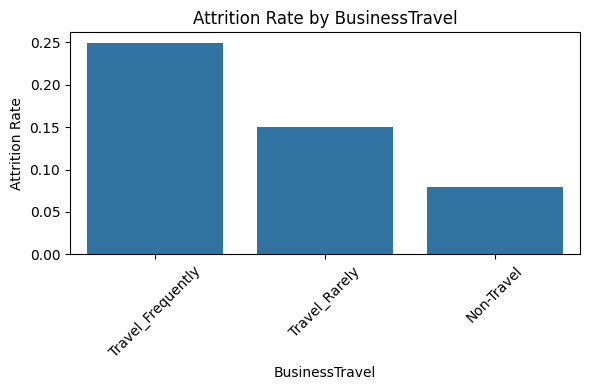

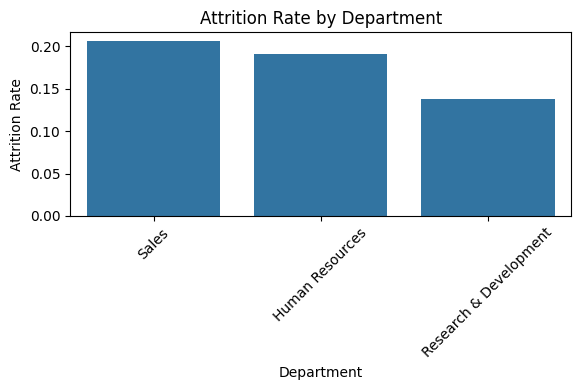

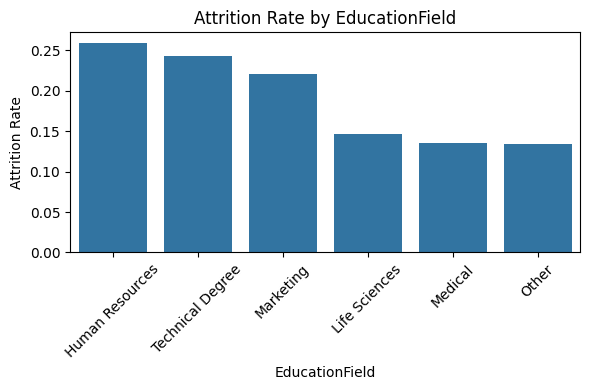

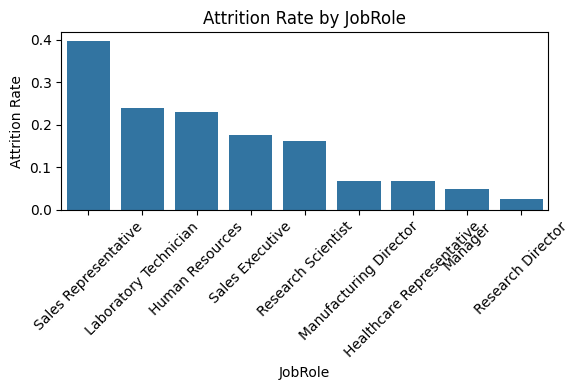

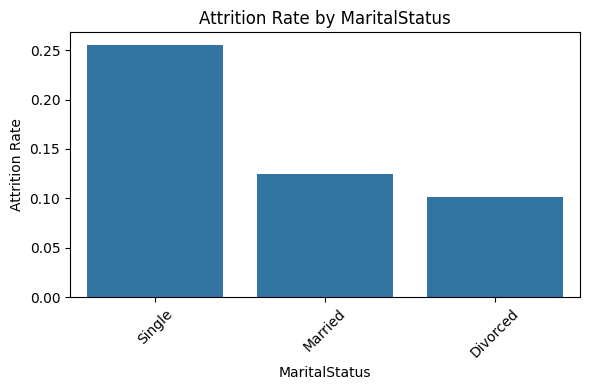

In [70]:

# plt.figure(figsize=(16, 14))
# df.corr=df.numerical.corr()
# sns.heatmap(df.corr, annot=True, cmap='coolwarm', fmt='.2f')



for col in df.categorical:
    plt.figure(figsize=(6, 4))
    # Group by category and take the mean attrition (which = attrition rate)
    attrition_rate = df.groupby(col)['Attrition_num'].mean().sort_values(ascending=False)
    
    sns.barplot(x=attrition_rate.index, y=attrition_rate.values)
    plt.xticks(rotation=45)
    plt.title(f'Attrition Rate by {col}')
    plt.ylabel('Attrition Rate')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [75]:
df_encoded = pd.get_dummies(df.categorical, drop_first=True)
df_encoded=df_encoded.astype('int')

df_final=pd.concat([df.numerical, df_encoded], axis=1)

df_final



,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,3,2,4,5993,8,11,...,0,0,0,0,0,0,1,0,0,1
1,49,8,1,3,2,2,2,5130,1,23,...,0,0,0,0,0,1,0,0,1,0
2,37,2,2,4,2,1,3,2090,6,15,...,0,1,0,0,0,0,0,0,0,1
3,33,3,4,4,3,1,3,2909,1,11,...,0,0,0,0,0,1,0,0,1,0
4,27,2,1,1,3,1,2,3468,9,12,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,3,4,2,4,2571,4,17,...,0,1,0,0,0,0,0,0,1,0
1466,39,6,1,4,2,3,1,9991,4,15,...,0,0,0,0,0,0,0,0,1,0
1467,27,4,3,2,4,2,2,6142,1,20,...,0,0,0,1,0,0,0,0,1,0
1468,49,2,3,4,2,2,2,5390,2,14,...,0,0,0,0,0,0,1,0,1,0


In [76]:
df_final.to_csv("HrData_ML_ready.csv", index=False)


